In [1]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import matthews_corrcoef
from mlxtend.evaluate import bias_variance_decomp
from tensorflow.keras.callbacks import EarlyStopping

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.preprocessing import sequence
np.random.seed(7)
from keras.utils import pad_sequences
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

2023-06-11 10:52:16.181825: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-11 10:52:16.336836: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/sanju/ns-allinone-2.35/otcl-1.14:/home/sanju/ns-allinone-2.35/lib
2023-06-11 10:52:16.336859: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-11 10:52:17.212496: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7';

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10230245959766987397
xla_global_id: -1
]


2023-06-11 10:52:20.122673: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-11 10:52:20.129822: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-06-11 10:52:20.129889: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sanju-HP-Notebook): /proc/driver/nvidia/version does not exist


In [2]:
import joblib

In [3]:
from keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

In [4]:
X=[]
y=[]
base_path='dataset3/'
source_path=base_path
for child in os.listdir(source_path):
    sub_path = os.path.join(source_path, child)
    if os.path.isdir(sub_path):
        for data_file in os.listdir(sub_path):
            file_path = os.path.join(sub_path, data_file)
            print(file_path)
            data=pd.read_csv(file_path,header=None)
            print(data.shape)
            data=data.to_numpy()
            X.append(data)
            y.append(child)           

dataset3/0/4-56.csv
(36, 63)
dataset3/0/1+47.csv
(23, 63)
dataset3/0/1ar (3rd copy).csv
(28, 63)
dataset3/0/1-13.csv
(28, 63)
dataset3/0/1-65.csv
(30, 63)
dataset3/0/1-23.csv
(36, 63)
dataset3/0/4al (another copy).csv
(36, 63)
dataset3/0/4-51.csv
(36, 63)
dataset3/0/3-9.csv
(28, 63)
dataset3/0/1+37.csv
(41, 63)
dataset3/0/1-38.csv
(41, 63)
dataset3/0/1-12.csv
(28, 63)
dataset3/0/1+26.csv
(26, 63)
dataset3/0/1+11.csv
(28, 63)
dataset3/0/3-3.csv
(35, 63)
dataset3/0/4-76.csv
(35, 63)
dataset3/0/1ar.csv
(28, 63)
dataset3/0/4-4.csv
(35, 63)
dataset3/0/1-3.csv
(35, 63)
dataset3/0/2-2.csv
(35, 63)
dataset3/0/1-4.csv
(35, 63)
dataset3/0/1+1.csv
(35, 63)
dataset3/0/3-10.csv
(28, 63)
dataset3/0/3-94.csv
(26, 63)
dataset3/0/1+17.csv
(36, 63)
dataset3/0/3-41.csv
(23, 63)
dataset3/0/1al (6th copy).csv
(35, 63)
dataset3/0/3-7.csv
(35, 63)
dataset3/0/2-36.csv
(41, 63)
dataset3/0/1ar (5th copy).csv
(28, 63)
dataset3/0/1+40.csv
(41, 63)
dataset3/0/4-97.csv
(26, 63)
dataset3/0/2al (6th copy).csv
(36, 63

(36, 63)
dataset3/0/2ar (4th copy).csv
(26, 63)
dataset3/0/3-46.csv
(23, 63)
dataset3/0/3-60.csv
(24, 63)
dataset3/0/1-63.csv
(24, 63)
dataset3/0/1-41.csv
(23, 63)
dataset3/0/5al (6th copy).csv
(30, 63)
dataset3/0/4-64.csv
(24, 63)
dataset3/0/2-8.csv
(35, 63)
dataset3/0/ex1 (3rd copy).csv
(26, 63)
dataset3/0/4-38.csv
(41, 63)
dataset3/0/1+41.csv
(23, 63)
dataset3/0/2-66.csv
(30, 63)
dataset3/0/3-54.csv
(36, 63)
dataset3/0/1+35.csv
(41, 63)
dataset3/0/5al (5th copy).csv
(30, 63)
dataset3/0/2-4.csv
(35, 63)
dataset3/0/4-1.csv
(35, 63)
dataset3/0/1+6.csv
(35, 63)
dataset3/0/1+19.csv
(36, 63)
dataset3/0/4-79.csv
(35, 63)
dataset3/0/ex1 (another copy).csv
(26, 63)
dataset3/0/3-83.csv
(29, 63)
dataset3/0/3-51.csv
(36, 63)
dataset3/0/5al.csv
(30, 63)
dataset3/0/1-37.csv
(41, 63)
dataset3/0/3al (another copy).csv
(41, 63)
dataset3/0/1-5.csv
(35, 63)
dataset3/0/2-64.csv
(24, 63)
dataset3/0/ex1 (9th copy).csv
(26, 63)
dataset3/0/1-34.csv
(41, 63)
dataset3/0/4-73.csv
(26, 63)
dataset3/0/1-15.csv


(41, 63)
dataset3/1/005-203.csv
(37, 63)
dataset3/1/ud5.csv
(36, 63)
dataset3/1/005-179.csv
(48, 63)
dataset3/1/0011-58.csv
(46, 63)
dataset3/1/005-101.csv
(42, 63)
dataset3/1/0011-37.csv
(34, 63)
dataset3/1/005-124.csv
(36, 63)
dataset3/1/0011-115.csv
(36, 63)
dataset3/1/0011-71.csv
(42, 63)
dataset3/1/0011-19.csv
(48, 63)
dataset3/1/005-97.csv
(34, 63)
dataset3/1/005-26.csv
(38, 63)
dataset3/1/005-107.csv
(34, 63)
dataset3/1/0011-108.csv
(46, 63)
dataset3/1/0011-54.csv
(36, 63)
dataset3/1/005-2.csv
(36, 63)
dataset3/1/005+11.csv
(42, 63)
dataset3/1/0011-34.csv
(36, 63)
dataset3/1/0011-75.csv
(36, 63)
dataset3/1/0011-23.csv
(37, 63)
dataset3/1/005-84.csv
(36, 63)
dataset3/1/0011-15.csv
(36, 63)
dataset3/1/005-12.csv
(36, 63)
dataset3/1/005-59.csv
(48, 63)
dataset3/1/0011-41.csv
(42, 63)
dataset3/1/0055+28.csv
(46, 63)
dataset3/1/005+7.csv
(34, 63)
dataset3/1/0011-77.csv
(34, 63)
dataset3/1/005-131.csv
(42, 63)
dataset3/1/005-196.csv
(38, 63)
dataset3/1/0055+53.csv
(37, 63)
dataset3/1/

(38, 63)
dataset3/1/005-76.csv
(38, 63)
dataset3/1/005-174.csv
(36, 63)
dataset3/1/005-225.csv
(36, 63)
dataset3/1/005-195.csv
(36, 63)
dataset3/1/005-167.csv
(34, 63)
dataset3/1/or+52.csv
(36, 63)
dataset3/1/005-152.csv
(36, 63)
dataset3/1/005-172.csv
(36, 63)
dataset3/1/005-135.csv
(36, 63)
dataset3/1/0011-120.csv
(41, 63)
dataset3/1/or-51.csv
(42, 63)
dataset3/1/005-39.csv
(48, 63)
dataset3/1/005-205.csv
(36, 63)
dataset3/1/0011-100.csv
(41, 63)
dataset3/1/005-108.csv
(46, 63)
dataset3/1/005-61.csv
(42, 63)
dataset3/1/005-149.csv
(48, 63)
dataset3/1/005-234.csv
(36, 63)
dataset3/1/005+16.csv
(38, 63)
dataset3/1/0055+23.csv
(37, 63)
dataset3/1/0011-14.csv
(36, 63)
dataset3/1/0011-28.csv
(46, 63)
dataset3/1/005-37.csv
(34, 63)
dataset3/1/or+59.csv
(48, 63)
dataset3/1/0011-9.csv
(48, 63)
dataset3/1/005-86.csv
(38, 63)
dataset3/1/005-128.csv
(46, 63)
dataset3/1/or+57.csv
(34, 63)
dataset3/1/005+2.csv
(36, 63)
dataset3/1/005-87.csv
(34, 63)
dataset3/1/005-136.csv
(38, 63)
dataset3/1/0011

In [5]:
y = np.array(y)

In [6]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

In [8]:
max_review_length = 50
X_train = pad_sequences(X_train, maxlen=max_review_length)
X_test = pad_sequences(X_test, maxlen=max_review_length)

In [9]:
X_train = X_train.reshape(-1, 50* 63)
X_test = X_test.reshape(-1, 50* 63)

In [10]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [12]:
np.save('training_data.npy', X_train)

In [13]:
X_train = X_train.reshape(-1, 50, 63)
X_test = X_test.reshape(-1, 50, 63)

In [14]:
X_train=np.array(X_train)
y_train=np.array(y_train)

In [15]:
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [16]:
model = Sequential()
model.add(LSTM(64, input_shape=(50, 63), return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(16))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history=model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/20
24/24 [==============================] - 8s 117ms/step - loss: 0.6429 - accuracy: 0.6069 - val_loss: 0.5006 - val_accuracy: 0.8182
Epoch 2/20
24/24 [==============================] - 1s 62ms/step - loss: 0.4624 - accuracy: 0.7652 - val_loss: 0.4203 - val_accuracy: 0.7628
Epoch 3/20
24/24 [==============================] - 1s 62ms/step - loss: 0.4418 - accuracy: 0.7718 - val_loss: 0.4140 - val_accuracy: 0.8182
Epoch 4/20
24/24 [==============================] - 2s 63ms/step - loss: 0.4379 - accuracy: 0.7797 - val_loss: 0.4227 - val_accuracy: 0.8182
Epoch 5/20
24/24 [==============================] - 1s 62ms/step - loss: 0.4262 - accuracy: 0.7599 - val_loss: 0.4040 - val_accuracy: 0.8182
Epoch 6/20
24/24 [==============================] - 2s 62ms/step - loss: 0.4190 - accuracy: 0.7757 - val_loss: 0.4008 - val_accuracy: 0.7628
Epoch 7/20
24/24 [==============================] - 2s 63ms/step - loss: 0.4209 - accuracy: 0.7612 - val_loss: 0.4012 - val_accuracy: 0.7628
Epoch 8/20
2

In [17]:
loss, accuracy = model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 19ms/step - loss: 0.3802 - accuracy: 0.8182


In [18]:
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.3802
Test Accuracy: 0.8182


In [19]:
print(model.predict(X_test))

8/8 [==============================] - 1s 18ms/step
[[0.00450626]
 [0.74794495]
 [0.74794495]
 [0.74794495]
 [0.00416198]
 [0.6025632 ]
 [0.6025632 ]
 [0.00546881]
 [0.67807865]
 [0.73353994]
 [0.67807865]
 [0.9006968 ]
 [0.67807865]
 [0.6025632 ]
 [0.6025632 ]
 [0.9006968 ]
 [0.6025632 ]
 [0.5376207 ]
 [0.9351134 ]
 [0.6025632 ]
 [0.6025632 ]
 [0.6025632 ]
 [0.5376207 ]
 [0.6025632 ]
 [0.73353994]
 [0.9351134 ]
 [0.6025632 ]
 [0.00546881]
 [0.9006968 ]
 [0.00506397]
 [0.9351134 ]
 [0.6025632 ]
 [0.9006968 ]
 [0.73353994]
 [0.00416198]
 [0.6025632 ]
 [0.00446003]
 [0.67807865]
 [0.9006968 ]
 [0.9351134 ]
 [0.00416198]
 [0.9351134 ]
 [0.6417529 ]
 [0.9006968 ]
 [0.73353994]
 [0.00416198]
 [0.73353994]
 [0.00450626]
 [0.9006968 ]
 [0.00416198]
 [0.6417529 ]
 [0.5376207 ]
 [0.6025632 ]
 [0.6025632 ]
 [0.73353994]
 [0.00416198]
 [0.00475197]
 [0.74794495]
 [0.6025632 ]
 [0.00450626]
 [0.6025632 ]
 [0.5763364 ]
 [0.6025632 ]
 [0.00446003]
 [0.73353994]
 [0.6025632 ]
 [0.6025632 ]
 [0.935113

In [20]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

8/8 [==============================] - 0s 18ms/step


In [21]:
print(y_test)

[[0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.

In [22]:
cm = confusion_matrix(y_test, y_pred)

Confusion Matrix:
[[ 70  46]
 [  0 137]]


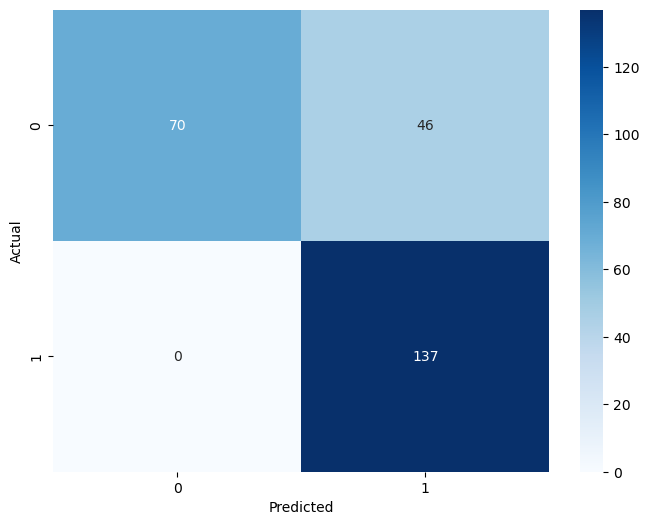

In [23]:

print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [24]:
print('Precision: %.3f' % precision_score(y_test, y_pred))

Precision: 0.749


In [25]:
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 1.000


In [26]:
print(matthews_corrcoef(y_test, y_pred))

0.6721322965057026


In [27]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [28]:
fpr1, tpr1, thresholds_keras = roc_curve(y_test, y_pred)

Text(0, 0.5, 'True Positive rate')

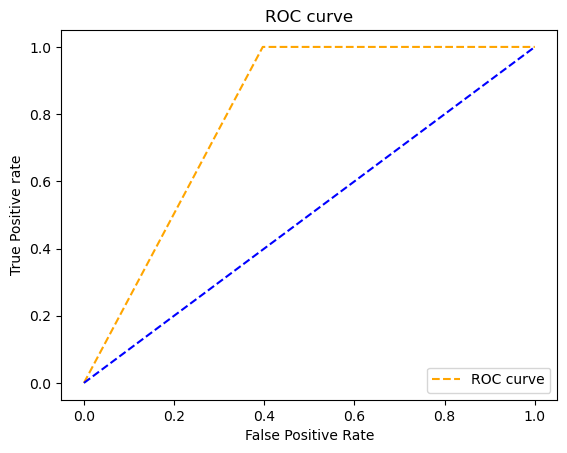

In [29]:
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='ROC curve')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.legend(loc='lower right')
plt.ylabel('True Positive rate')

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

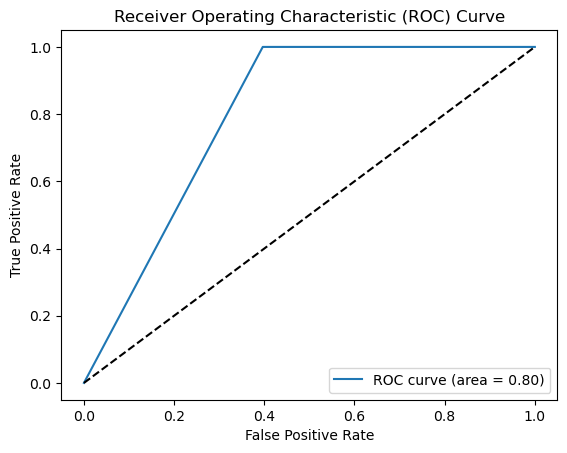

In [31]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # plot the diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [32]:
auc_score1 = roc_auc_score(y_test, y_pred)
print(auc_score1)

0.8017241379310345


In [33]:
#modelClass.save("my_model")

In [34]:
from keras.models import save_model

In [35]:
#plot_model(model, to_file='model.png')

In [36]:
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

Validation Loss: [0.500579297542572, 0.42031359672546387, 0.41395917534828186, 0.42270970344543457, 0.40400707721710205, 0.40083250403404236, 0.40120434761047363, 0.39399516582489014, 0.39632484316825867, 0.393404483795166, 0.391961008310318, 0.38708174228668213, 0.3861609101295471, 0.3969340920448303, 0.3836011588573456, 0.38069647550582886, 0.3852911591529846, 0.377149760723114, 0.3812280595302582, 0.3802400529384613]
Validation Accuracy: [0.8181818127632141, 0.7628458738327026, 0.8181818127632141, 0.8181818127632141, 0.8181818127632141, 0.7628458738327026, 0.7628458738327026, 0.8181818127632141, 0.7628458738327026, 0.7628458738327026, 0.8181818127632141, 0.8181818127632141, 0.8181818127632141, 0.8181818127632141, 0.8181818127632141, 0.8181818127632141, 0.8181818127632141, 0.8181818127632141, 0.8181818127632141, 0.8181818127632141]


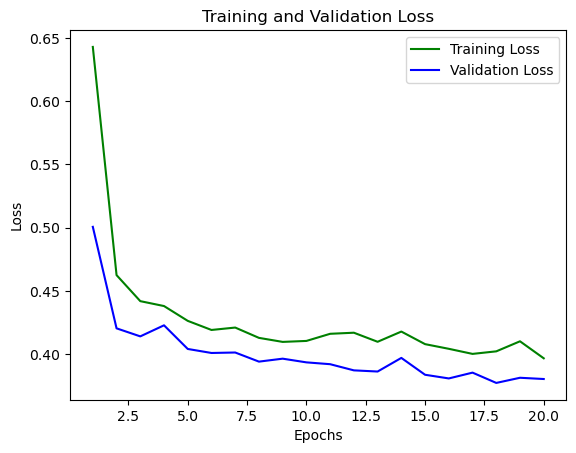

In [37]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [38]:
model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 18ms/step - loss: 0.3802 - accuracy: 0.8182


[0.3802400529384613, 0.8181818127632141]

In [40]:
save_model(model, 'your_model.h5')